In [19]:
import numpy as np
import harmonica as hm
import verde as vd
import matplotlib.pyplot as plt
import xrft
import warnings

In [20]:
warnings.filterwarnings('ignore')

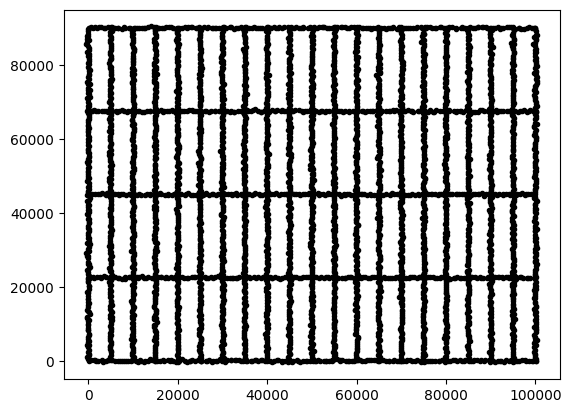

In [21]:
########## Definindo parâmetros do levantamento
spacing = 5000 # espaçamento entre as linhas de voo
northing = 90e3 # limite ao norte
easting = 100e3 # limite a leste
region = [0, easting, 0, northing]
spacing_1 = (500,spacing) 
coordinates_1 = vd.grid_coordinates(region=region, spacing=spacing_1, extra_coords=500) 
spacing_2 = (20000,500)
coordinates_2 = vd.grid_coordinates(region=region, spacing=spacing_2, extra_coords=500) 
#plt.plot(coordinates_1[0],coordinates_1[1], ".k")
#plt.plot(coordinates_2[0],coordinates_2[1], ".k")

############### TRANSF. ALTITUDE DE VOO EM POLINOMIO (suavizar a variação de altitude do voo) 
########### ALTERAR O EXTRA_COORDS DE coordinates_1 e coordinates_2 PARA TRANSFORMAR EM POLINOMIO: portanto, alterar coordinates_1[2] e coordinates_2[2]
########### OU SEJA, preciso de 2 vetores: polinomio_1 -> deve ter o mesmo shape que coordinates_1[2] 
###########                                polinomio_2 -> deve ter o mesmo shape que coordinates_2[2]

####### Então devo somar os vetores de polinomio com seus respectivos coordinates 
#################### coordinates_1[2] += polinomio_1                 
#################### coordinates_2[2] += polinomio_2      

x1 = np.linspace(0,northing,len(coordinates_1[2]))
polinomio_1 = 10*np.sin(0.1*x1)+np.cos(0.1*x1)
#plt.plot(x1,polinomio_1)

for i in range(len(coordinates_1[2][0])):
    for j in range (len(coordinates_1[2])):
        coordinates_1[2][j][i] += polinomio_1[j]

x2 = np.linspace(0,easting,len(coordinates_2[2][0]))
polinomio_2 = 10*np.sin(0.1*x2)+np.cos(0.1*x2)
#plt.plot(x2,polinomio_2)

for i in range(len(coordinates_2[2])):
    for j in range (len(coordinates_2[2][0])):
        coordinates_2[2][i][j] += polinomio_2[j]


########## Concatenando coordinates_1 e coordinates_2 
coordinates_1_2 = []
for i in range(0,3):
    coordinates_1_2.append(np.concatenate((np.ravel(coordinates_1[i]),np.ravel(coordinates_2[i]))))
#plt.plot(coordinates[0],coordinates[1],".k")

######### Adicionando ruído nas coordenadas do levantamento 
noise_level_coords = 150

coordinates = [ 
    coordinates_1_2[0] + np.random.normal(0, noise_level_coords, size=coordinates_1_2[i].shape),
    coordinates_1_2[1] + np.random.normal(0, noise_level_coords, size=coordinates_1_2[i].shape),
    coordinates_1_2[2],
]


plt.plot(coordinates[0],coordinates[1],".k")

In [22]:
def plain_coordinates(spacing):
    '''
    Função feita com a célula acima.
    _____________________________
    Recebe
    ----------
    spacing (espaçamento das linhas de voo na direção x)
    _____________________________
    Retorna 
    ----------
    as coordenadas do levantamento.
    _____________________________
    ''' 
    # Definindo parâmetros do levantamento
    northing = 90e3 # limite ao norte
    easting = 100e3 # limite ao sul 
    region = [0, easting, 0, northing]
    spacing_1 = (500,spacing) 
    coordinates_1 = vd.grid_coordinates(region=region, spacing=spacing_1, extra_coords=500) 
    spacing_2 = (20000,500)
    coordinates_2 = vd.grid_coordinates(region=region, spacing=spacing_2, extra_coords=500)    

    # Criando polinômios que simulam a altitude real de voo
    x1 = np.linspace(0,northing,len(coordinates_1[2]))
    polinomio_1 = 10*np.sin(0.1*x1)+np.cos(0.1*x1)
    
    for i in range(len(coordinates_1[2][0])):
        for j in range (len(coordinates_1[2])):
            coordinates_1[2][j][i] += polinomio_1[j]
    
    x2 = np.linspace(0,easting,len(coordinates_2[2][0]))
    polinomio_2 = 10*np.sin(0.1*x2)+np.cos(0.1*x2)
    for i in range(len(coordinates_2[2])):
        for j in range (len(coordinates_2[2][0])):
            coordinates_2[2][i][j] += polinomio_2[j]

    
    # Concatenando coordinates_1 e coordinates_2 
    coordinates_1_2 = []
    for i in range(0,3):
        coordinates_1_2.append(np.concatenate((np.ravel(coordinates_1[i]),np.ravel(coordinates_2[i]))))
    
    # Adicionando ruído nas coordenadas do levantamento 
    noise_level_coords = 150
    
    coordinates = [ 
        coordinates_1_2[0] + np.random.normal(0, noise_level_coords, size=coordinates_1_2[i].shape),
        coordinates_1_2[1] + np.random.normal(0, noise_level_coords, size=coordinates_1_2[i].shape),
        coordinates_1_2[2],
    ]


    return (coordinates)

# spacing = 5000
# coordinates = plain_coordinates(spacing)

Text(0, 0.5, 'altitude do voo')

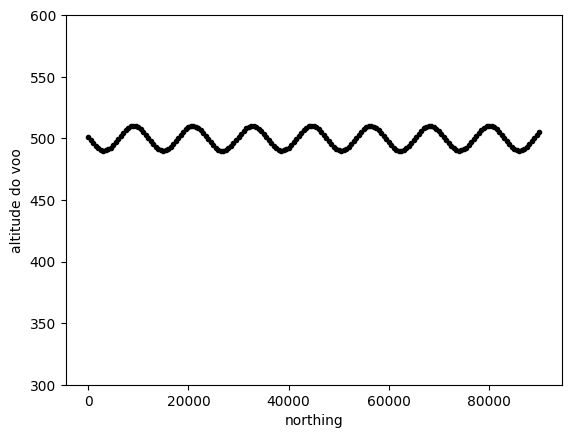

In [23]:
# Visualizar as linhas de voo

coords_1 = []
for j in range (len(coordinates_1[2])):
    coords_1.append(coordinates_1[2][j][0])
x_coords_1 = np.linspace(0,90e3,len(coords_1))

plt.plot(x_coords_1,coords_1,".k")
plt.ylim(300,600)
plt.xlabel("northing")
plt.ylabel("altitude do voo")



Text(0, 0.5, 'altitude do voo')

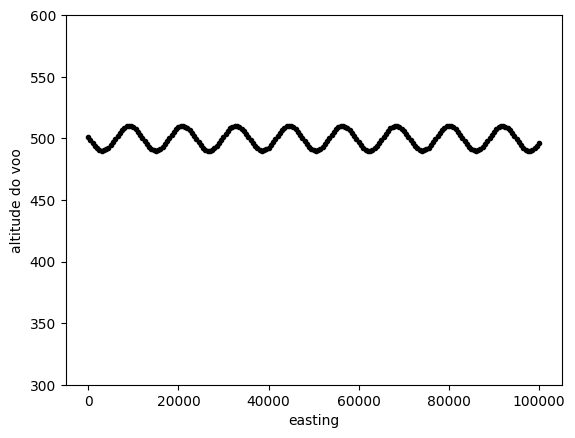

In [24]:
# Visualizar as linhas de voo

# coords_2 = []
# for j in range (len(coordinates_2[2])):
#     coords_2.append(coordinates_2[2][j][0])
# x_coords_2 = np.linspace(0,100e3,len(coords_2))

coords_2 = []
for j in range (len(coordinates_2[2][0])):
        coords_2.append(coordinates_2[2][i][j])
x_coords_2 = np.linspace(0,100e3,len(coords_2))

plt.plot(x_coords_2,coords_2,".k")
plt.ylim(300,600)
plt.xlabel("easting")
plt.ylabel("altitude do voo")

In [25]:
def magnetic(coordinates):
    inclination, declination = -20, -15
    base_level = 500
    noise_level = 200
    main_field = hm.magnetic_angles_to_vec(1, inclination, declination)
    magnetic_anomaly = 0
    # Dipoles
    dipole_coordinates = (60e3, 60e3, -1.5e3)
    magnetic_field = hm.dipole_magnetic(
        coordinates,
        dipoles=dipole_coordinates,
        magnetic_moments=hm.magnetic_angles_to_vec(3.5e11, inclination, declination),
        field="b",
    )
    magnetic_anomaly = sum(b * f for b, f in zip(magnetic_field, main_field))
    
    dipole2_coordinates = (20e3, 80e3, -2e3)
    magnetic_field = hm.dipole_magnetic(
        coordinates,
        dipoles=dipole2_coordinates,
        magnetic_moments=hm.magnetic_angles_to_vec(2.5e11, inclination, declination),
        field="b",
    )
    magnetic_anomaly += sum(b * f for b, f in zip(magnetic_field, main_field))
    
    # Pipe
    size = 90
    pipe_coordinates = (60e3, 80e3, -2e3)
    magnetic_field = hm.prism_magnetic(
        coordinates,
        prisms=[
            pipe_coordinates[0] - size,
            pipe_coordinates[0] + size,
            pipe_coordinates[1] - size,
            pipe_coordinates[1] + size,
            pipe_coordinates[2] - 10e3,
            pipe_coordinates[2],
        ],
        magnetization=hm.magnetic_angles_to_vec(5.5e3, -90, 0),
        field="b",
    )
    magnetic_anomaly += sum(b * f for b, f in zip(magnetic_field, main_field))
    
    # Dike
    dike_coordinates = (30e3, 30e3, 0)
    magnetic_field = hm.prism_magnetic(
        coordinates,
        prisms=[
            dike_coordinates[0] - 100e3,
            dike_coordinates[0] + 100e3,
            dike_coordinates[1] - 1000,
            dike_coordinates[1] + 1000,
            dike_coordinates[2] - 100,
            dike_coordinates[2],
        ],
        magnetization=hm.magnetic_angles_to_vec(150, inclination, declination),
        field="b",
    )
    magnetic_anomaly += sum(b * f for b, f in zip(magnetic_field, main_field))
    
    # Line
    line_coordinates = [30e3, 50e3, -1.5e3]
    magnetic_field = hm.prism_magnetic(
        coordinates,
        prisms=[
            line_coordinates[0] - 50,
            line_coordinates[0] + 50,
            line_coordinates[1],
            line_coordinates[1] + 100e3,
            line_coordinates[2] - 500,
            line_coordinates[2] + 500,
        ],
        magnetization=hm.magnetic_angles_to_vec(2.5e3, inclination, declination),
        field="b",
    )
    magnetic_anomaly += sum(b * f for b, f in zip(magnetic_field, main_field))
    
    # Sill
    sill_coordinates = [80e3, 25e3, -0.5e3]
    magnetic_field = hm.prism_magnetic(
        coordinates,
        prisms=[
            sill_coordinates[0] - 10e3,
            sill_coordinates[0] + 10e3,
            sill_coordinates[1] - 15e3,
            sill_coordinates[1] + 15e3,
            sill_coordinates[2] - 100,
            sill_coordinates[2] + 100,
        ],
        magnetization=hm.magnetic_angles_to_vec(100, inclination, declination),
        field="b",
    )
    magnetic_anomaly += sum(b * f for b, f in zip(magnetic_field, main_field))
    
    # Regional
    magnetic_anomaly += 0.006 * coordinates[0] - 0.007 * coordinates[1]
    
    # Add noise and the base level
    magnetic_anomaly += np.random.default_rng(42).normal(
        0, noise_level, size=magnetic_anomaly.shape
    )
    magnetic_anomaly += base_level
    
    return(magnetic_anomaly)

magnetic_anomaly = magnetic(coordinates)

Text(0, 0.5, 'Northing (m)')

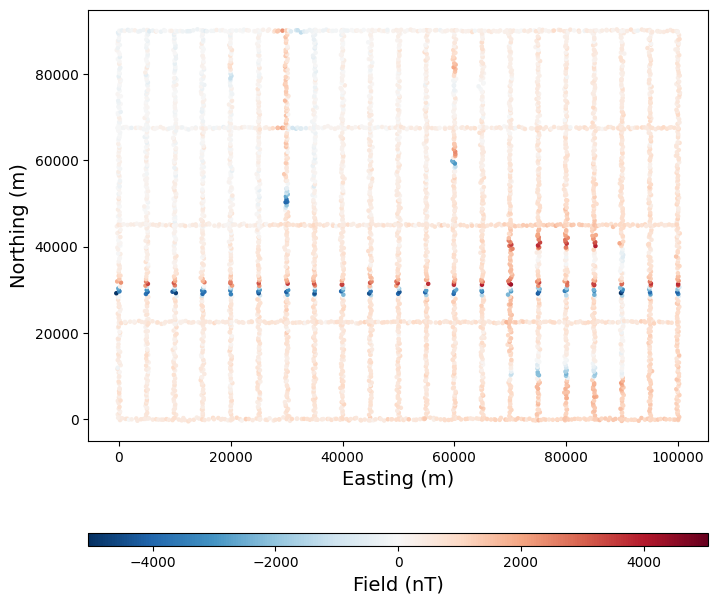

In [26]:
plt.figure(figsize=(8, 8))
maxabs = vd.maxabs(magnetic_anomaly)
plt.scatter(coordinates[0], coordinates[1], s=5, c=magnetic_anomaly,cmap="RdBu_r", vmin=-maxabs, vmax=maxabs)
#cbar = plt.colorbar().set_label(label="Field (nT)", size=14, weight='bold')
plt.colorbar(orientation="horizontal",aspect=50, pad=0.15).set_label(label="Field (nT)", size=14)
#cbar.tick_params(labelsize=14)
plt.xlabel("Easting (m)",fontsize=14)
plt.ylabel("Northing (m)",fontsize=14)



In [27]:
# Equivalent sources
fonts = hm.EquivalentSourcesGB(damping=1,depth=1e3)
fonts.fit([coordinates[0],coordinates[1],coordinates[2]],data=magnetic_anomaly)

EquivalentSourcesGB(damping=1, depth=1000.0)

Text(0, 0.5, 'Northing (m)')

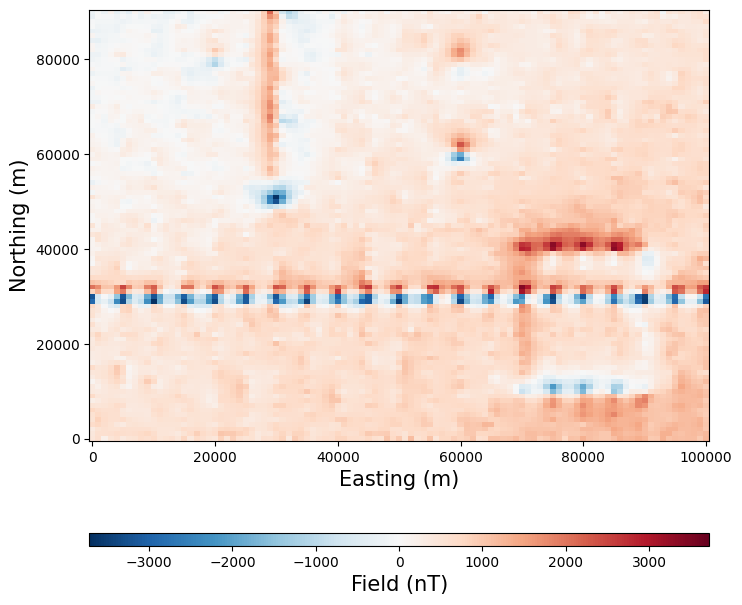

In [28]:
# Gridding equivalent sources
region = [0, 100e3, 0, 90e3]
grid_coords_eq = vd.grid_coordinates(region,spacing=1e3,extra_coords=500)
grid_eq = fonts.grid(grid_coords_eq,data_names="field")

fig, ax = plt.subplots(1,1,figsize=(8,8))
data = grid_eq.field.plot(ax=ax, add_colorbar=False)
fig.colorbar(data,ax=ax, orientation="horizontal",label="Field (nT)", aspect=50, pad=0.15).set_label("Field (nT)",size=15)
#cbar.ax.tick_params(labelsize=14)
ax.set_xlabel("Easting (m)",fontsize=15)
ax.set_ylabel("Northing (m)",fontsize=15)


#ax.set_title("Equivalent sources")

Text(0, 1.02, 'b)')

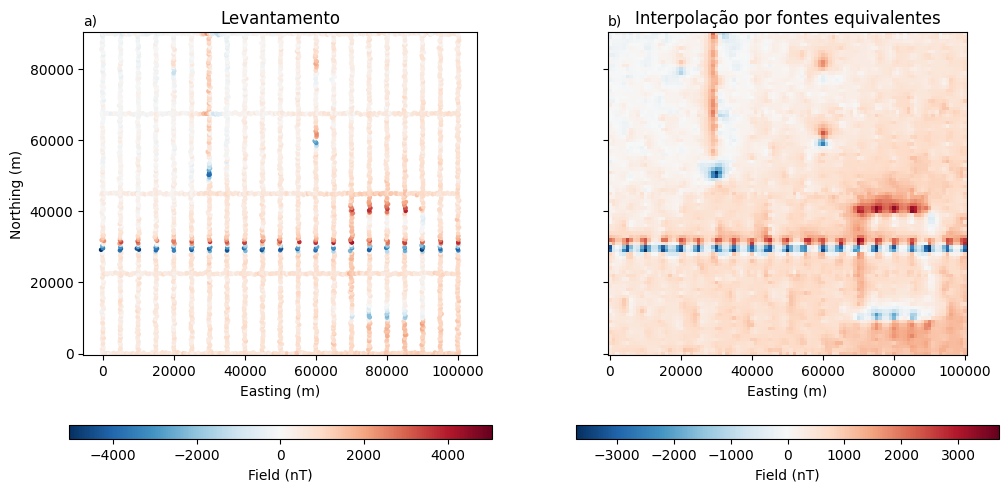

In [29]:
fig, axes = plt.subplots(1,2, sharey=True,figsize=(12,6))

escala = vd.maxabs(magnetic_anomaly)
tmp = axes[0].scatter(coordinates[0], coordinates[1], s=5, c=magnetic_anomaly, cmap="RdBu_r", vmin=-maxabs,vmax=maxabs)
fig.colorbar(tmp, label="Field (nT)", orientation="horizontal", aspect=30, pad=0.15)
axes[0].set_title("Levantamento")
axes[0].set_ylabel("Northing (m)")
axes[0].set_xlabel("Easting (m)")
axes[0].set_aspect("equal")
axes[0].text(0,1.02,"a)", transform=axes[0].transAxes)

escala = vd.maxabs(grid_eq.field)
tmp1 = grid_eq.field.plot(ax=axes[1], add_colorbar=False)
fig.colorbar(tmp1, label="Field (nT)", orientation="horizontal", aspect=30, pad=0.15)
axes[1].set_title("Interpolação por fontes equivalentes")
axes[1].set_xlabel("Easting (m)")
axes[1].set_aspect("equal")
axes[1].set_ylabel(" ")
axes[1].text(0,1.02,"b)", transform=axes[1].transAxes)

Text(0.5, 1.0, 'Regular grid')

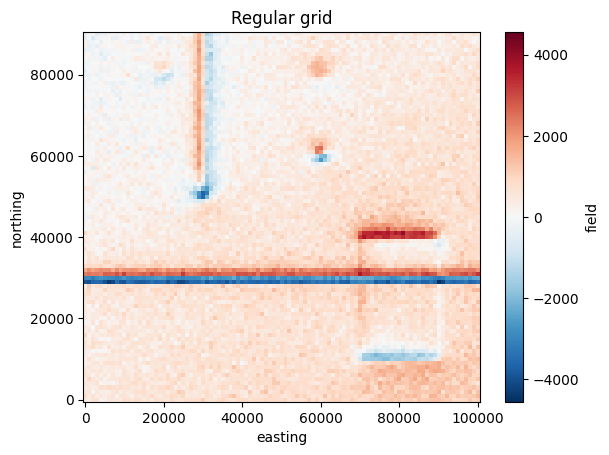

In [30]:
# # Regular grid

coordinates_grid = vd.grid_coordinates(region, spacing=1000, extra_coords=500)

magnetic_anomaly_grid = magnetic(coordinates_grid)

grid_true = vd.make_xarray_grid(
    coordinates_grid[:2], (magnetic_anomaly_grid, coordinates_grid[-1]), data_names=["field", "height"]
)
grid_true.field.plot()
plt.title("Regular grid")

Text(0.5, 1.0, 'Residuo')

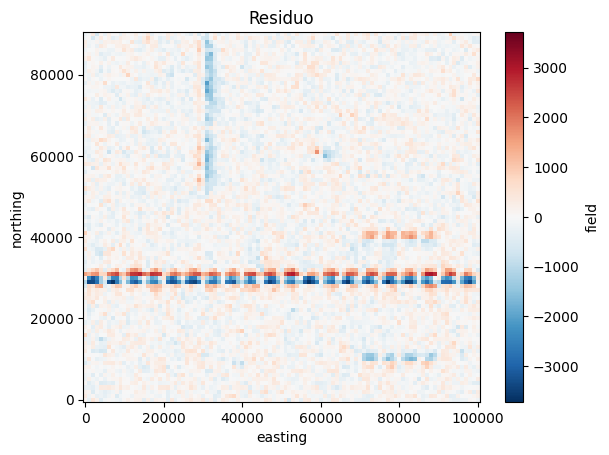

In [31]:
residuo = grid_true - grid_eq
residuo.field.plot()
plt.title("Residuo")

In [32]:
media = np.sum(grid_eq.field.values)/np.size(grid_eq.field)
residuo_2 = np.sum(residuo.field.values**2)
R_2_true = 1 - (residuo_2/np.sum((grid_eq.field.values- media)**2))
R_2_true

0.2284751250991085

In [33]:
# Random cross-validation 

R_2_random = np.mean(vd.cross_val_score(fonts,coordinates,magnetic_anomaly))
R_2_random

0.7644330935426622

In [34]:
# Blocked cross-validation

block = np.arange(1000,10950,950) 
nsplits = 5
R_2_block = [] 

for spacing in block:
    R_2_block.append(np.mean(
        vd.cross_val_score(
            fonts,
            coordinates,
            magnetic_anomaly,
            cv=vd.BlockKFold(spacing=spacing, n_splits=nsplits, shuffle=True, random_state=123),
        )
    ))

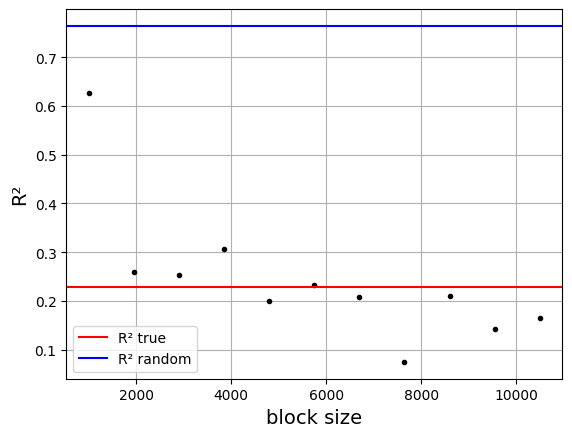

In [35]:
plt.plot(block,R_2_block,".k")
plt.xlabel("block size",fontsize=14)
plt.ylabel("R²",fontsize=14)
plt.axhline(y = R_2_true, color = 'red', label="R² true") 
plt.axhline(y = R_2_random, color = 'blue', label="R² random") 
plt.grid(True)
plt.legend()

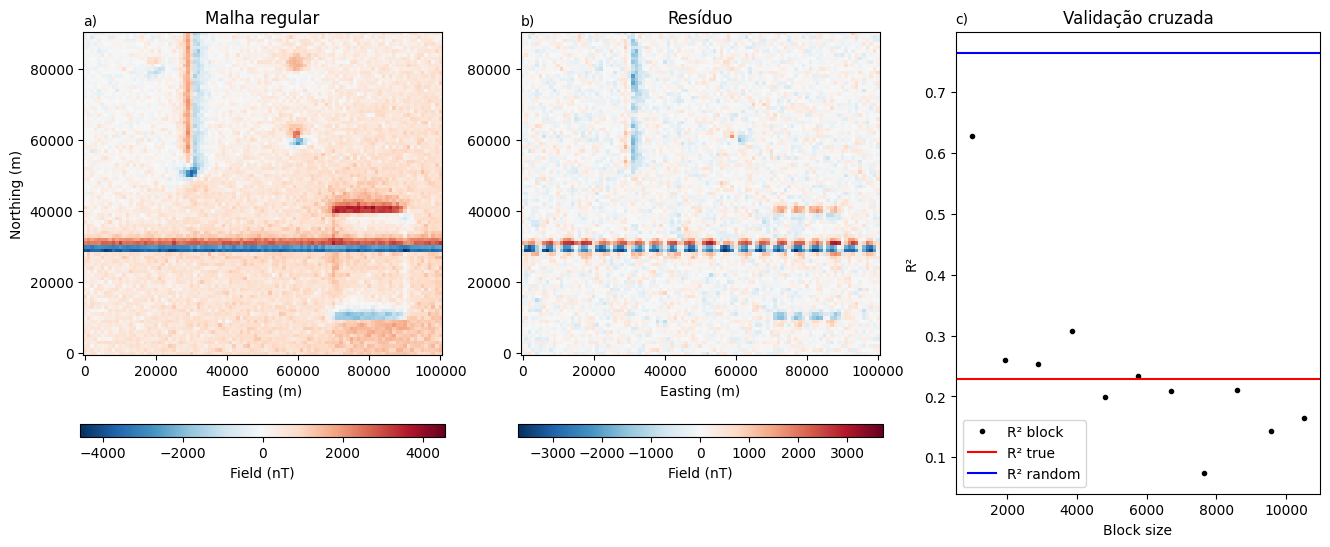

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(16,6) )

tmp = grid_true.field.plot(ax=axes[0], add_colorbar=False)
fig.colorbar(tmp, ax=axes[0], label="Field (nT)", orientation="horizontal", aspect=30, pad=0.15)
axes[0].set_aspect("equal")
axes[0].set_xlabel("Easting (m)")
axes[0].set_ylabel("Northing (m)")
axes[0].text(0,1.02,"a)", transform=axes[0].transAxes)
axes[0].set_title("Malha regular")

tmp1 = residuo.field.plot(ax=axes[1], add_colorbar=False)
fig.colorbar(tmp1, ax=axes[1], label="Field (nT)", orientation="horizontal", aspect=30, pad=0.15)
axes[1].set_aspect("equal")
axes[1].set_xlabel("Easting (m)")
axes[1].set_ylabel(" ")
axes[1].text(0,1.02,"b)", transform=axes[1].transAxes)
axes[1].set_title("Resíduo")

tmp2 = axes[2].plot(block, R_2_block,'.k', label='R² block')
axes[2].axhline(y = R_2_true, color = 'red', label="R² true") 
axes[2].axhline(y = R_2_random, color = 'blue', label="R² random") 
axes[2].set_ylabel("R²")
axes[2].set_xlabel("Block size")
axes[2].text(0,1.02,"c)", transform=axes[2].transAxes)
axes[2].set_title("Validação cruzada")
axes[2].legend()
plt.savefig('5.3.png', dpi=150)